<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Online Purchasing Consumer Behavior Analysis

The data is in `dat/online_shoppers_intention.csv.gz`, from [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset). The dataset consists of feature vectors belonging to 12,330 sessions, each session belongs to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell

import warnings
warnings.filterwarnings("ignore")

## **Task 1: Classification (50 points)**
Build a predictive classification model using data entries corresponding to the months of June—December as training set, and those corresponding to February—March as test set. 

More specifically,
1. Fit a logistic regression and at least one other classification model. Find and explain important features.
2. Report and interpret the most meaningful classifications metrics
3. Show and explain the hyper-parameter fitting process.

### Data Overview

In [2]:
import pandas as pd
import numpy as np


In [3]:
filepath = "dat/online_shoppers_intention.csv.gz"
data = pd.read_csv(filepath)

In [4]:
data.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3368,1,43.000000,1,0.0,3,65.000000,0.000000,0.040000,0.000000,0.6,May,2,2,1,4,Returning_Visitor,False,False
7126,2,30.200000,0,0.0,29,630.326667,0.006667,0.023333,0.000000,0.0,Sep,2,2,6,1,Returning_Visitor,False,False
7417,8,237.832601,0,0.0,84,2759.135058,0.005682,0.029265,4.477839,0.0,June,1,1,2,2,Returning_Visitor,False,False
7881,1,30.200000,0,0.0,5,323.400000,0.066667,0.083333,0.000000,0.0,Jul,2,4,1,3,Returning_Visitor,True,False
7874,11,293.622222,2,42.2,64,1831.942222,0.000000,0.015238,16.351559,0.0,Nov,2,5,3,4,Returning_Visitor,True,False


In [5]:
print("Dataset has {} samples and {} features".\
                  format(data.shape[0], data.shape[1]-1))

Dataset has 12330 samples and 17 features


In [6]:
print("column data types: ")
print("----")

data.dtypes

column data types: 
----


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
print("number of unique values per column: ")
print("----" )

data.nunique()

number of unique values per column: 
----


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [8]:
print("dataset has no missing values")
print("-----")

data.isna().sum()

dataset has no missing values
-----


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
print("Descriptive stats:")
print("----")

data.describe().T

Descriptive stats:
----


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### Split into train and test dataset 
* months of June—December as training set, and those corresponding to February—March as test set.
* Splitting  helps prevent "leaking" information about the testing data to the model, which in turns also prevents "overfitting"

In [10]:
month = data.Month.unique()

In [11]:
months_ = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',\
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

month_str2num = {s: i+1 for i, s in enumerate(months_)}

data["Month"] = data["Month"].replace(month_str2num)

In [12]:

print("before:  ", month)
print("after:  ", list(data.Month.unique()))

before:   ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
after:   [2, 3, 5, 10, 6, 7, 8, 11, 9, 12]


In [13]:

train_df = data[data.Month >= 6]
test_df = data[data.Month.isin([2,3])]

In [14]:
print('Original set  ---> ', data.shape,
      '\nTraining set  ---> ', train_df.shape,
      '\nTesting set   ---> ', test_df.shape)

Original set  --->  (12330, 18) 
Training set  --->  (6875, 18) 
Testing set   --->  (2091, 18)


### Exploratory Data Analysis

In [15]:
train_df.nunique()

Administrative               27
Administrative_Duration    2504
Informational                14
Informational_Duration      964
ProductRelated              302
ProductRelated_Duration    6046
BounceRates                1438
ExitRates                  3268
PageValues                 1673
SpecialDay                    1
Month                         7
OperatingSystems              8
Browser                      12
Region                        9
TrafficType                  15
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

* `SpecialDay` has only one unique value, offering no information. So we can safely ignore it for now
* `Revenue` is a binary feature - - > should encode to its equivalent numerical repr. `[0, 1]`

In [16]:
rev = train_df["Revenue"].unique()
rev

array([False,  True])

In [17]:

train_df["Revenue"] = train_df["Revenue"].astype(int)

print("before  :", list(rev))
print("after  :", list(train_df.Revenue.unique()))

before  : [False, True]
after  : [0, 1]


In [18]:
train_df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                      int64
dtype: object

In [19]:
categoricalFeatures = ["OperatingSystems",	"Browser", "Region", \
                              "TrafficType", "VisitorType", "Weekend"]

In [20]:
numericalFeatures = [name for name in train_df.columns \
                        if (name != "Revenue") &  (name not in categoricalFeatures)
                    ]

numericalFeatures

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month']

                                 Numeric Features Distribution                                  


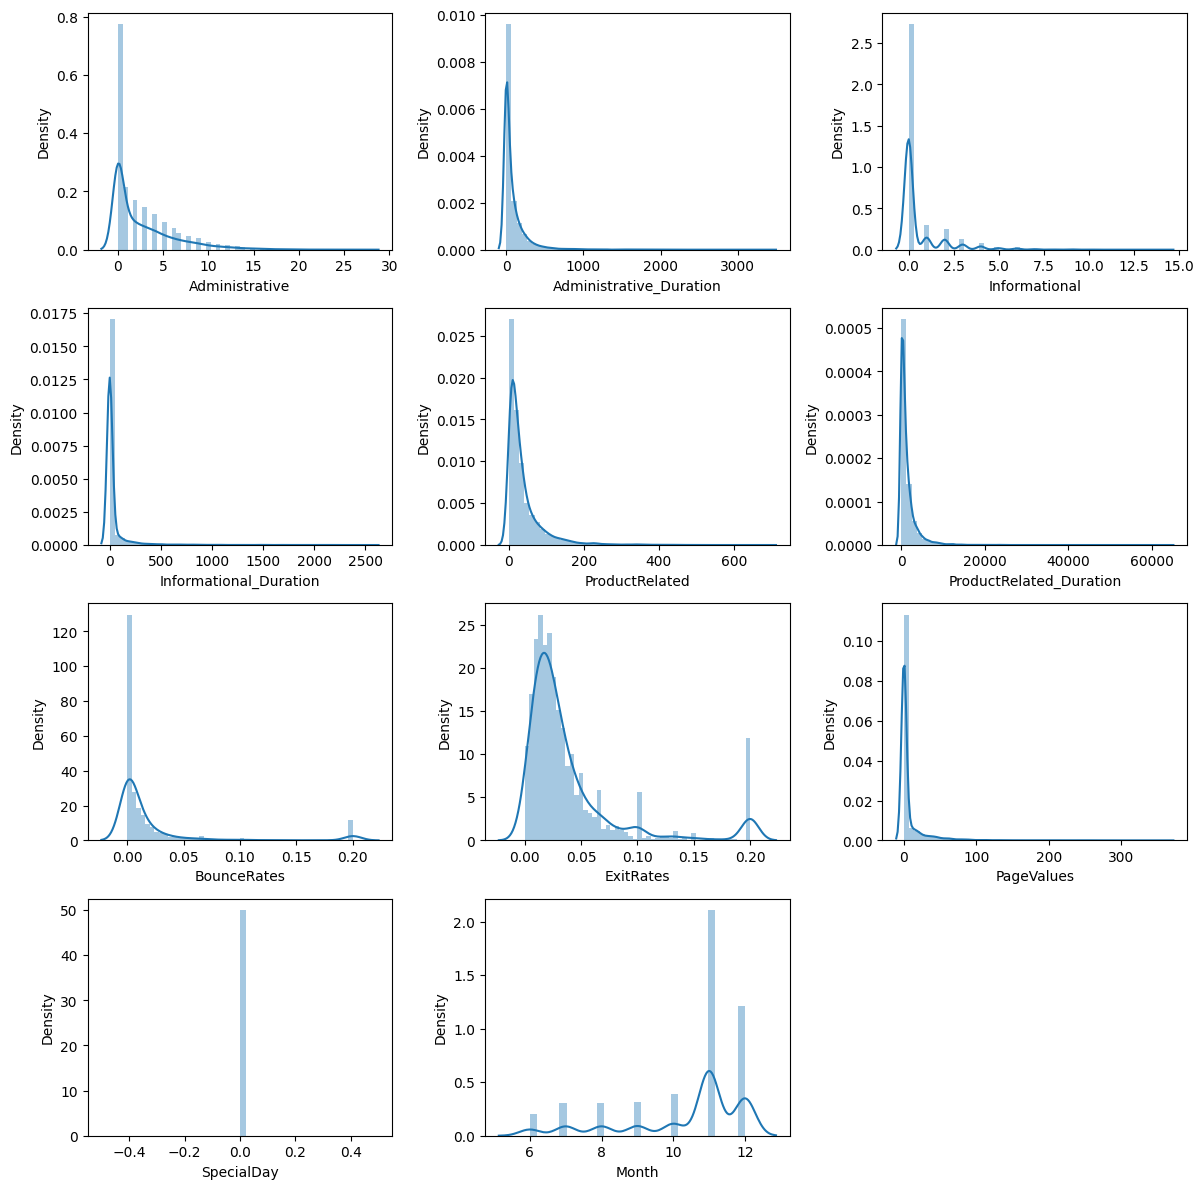

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

print('\033[1mNumeric Features Distribution'.center(100))

figsize = (12, 12) # (10,6)

n=len(numericalFeatures)

# histogram
plt.figure(figsize=figsize)
for i in range(len(numericalFeatures)):
    plt.subplot(4, 3 ,i+1)
    sns.distplot(train_df[numericalFeatures[i]]) 
plt.tight_layout();


 
- `BounceRate` and `ExitRate` are the only ones with a normal distribution, and values in the range [0,1]. Definitely have to normalize to maintian uniformity especially for the duration columns 

                               Visualising Categorical Features:                                


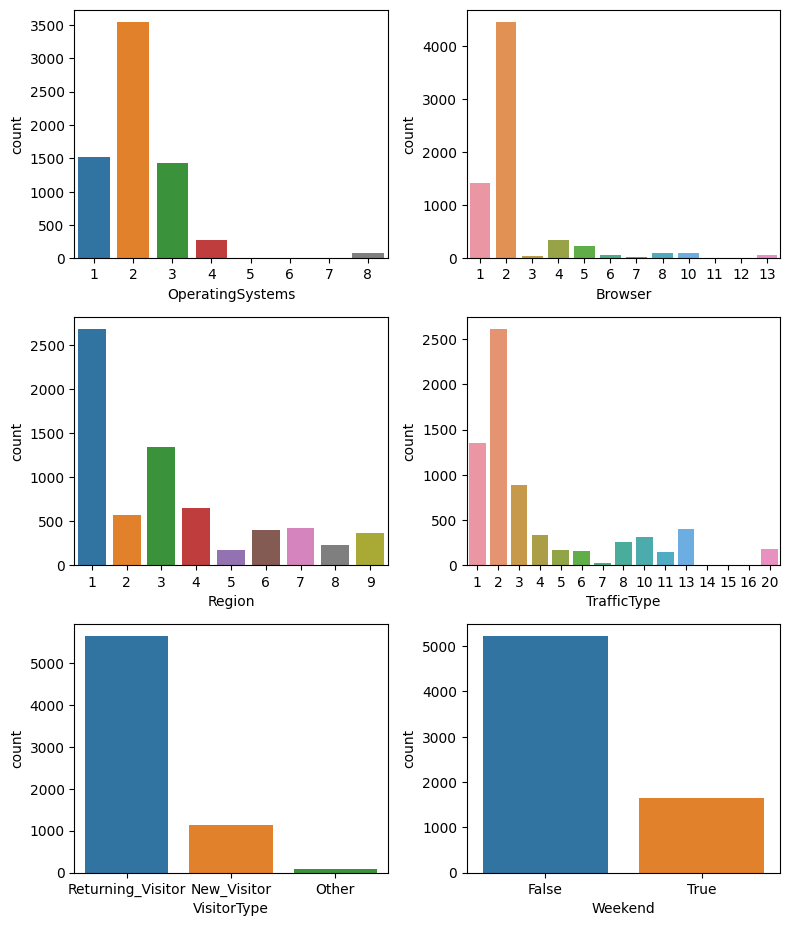

In [22]:
print('\033[1mVisualising Categorical Features:'.center(100))

plt.figure(figsize=(8, 12))

for i in range(len(categoricalFeatures)):
    plt.subplot(4, 2, i+1)
    sns.countplot(train_df[categoricalFeatures[i]])
plt.tight_layout();

In [ ]:
print("Row distribution (%) of some categorical features: \n" )
for col in ["VisitorType", "Weekend", "Revenue"]:
    print(train_df[col].value_counts()/len(train_df))
    print("\n")

### Feature Engineering

In [24]:
x_train = train_df.drop("Revenue", axis=1) #.values
x_test = test_df.drop("Revenue", axis=1)

y_train = train_df["Revenue"]
y_test = test_df["Revenue"]

In [25]:
x_train.shape

(6875, 17)

* As observed earlier, a majority of the numerical features dont have a normal distribution and should therefore be normalized, i.e 
scaled to be of a similar range using sckitik learn's `MinMaxScaler` 
* Similarly, some of the categorical features  need to be standardized using `OneHotEncoder`

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def normalizer_encoder_func(x_train, x_test):
    """Function that handles the Normalization and Hot encoding """
    
    scaler = MinMaxScaler() 
    x_train_num = scaler.fit_transform(x_train[numericalFeatures]) 
    x_test_num = scaler.transform(x_test[numericalFeatures]) 
    
    
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    x_train_cat = ohe.fit_transform(x_train[categoricalFeatures])
    x_test_cat = ohe.transform(x_test[categoricalFeatures])
    new_cat_features = list(ohe.get_feature_names_out(categoricalFeatures))
    
    
    x_train_transformed = np.hstack([x_train_num, x_train_cat])
    x_test_transformed = np.hstack([x_test_num, x_test_cat])

    return  new_cat_features, x_train_transformed, x_test_transformed


new_cat_features, X_train, X_test  = normalizer_encoder_func(x_train, x_test)


In [27]:
df_train = pd.DataFrame(X_train, columns=numericalFeatures + new_cat_features )
df_test  = pd.DataFrame(X_test, columns=numericalFeatures + new_cat_features )

In [28]:
print("original train dataset ---> :", train_df.shape)
print("original test dataset  --->:",  test_df.shape)

print("\n")
      
print("transformed train dataset  ---> :", df_train.shape)
print("transformed test dataset  --->:",   df_test.shape)

original train dataset ---> : (6875, 18)
original test dataset  --->: (2091, 18)


transformed train dataset  ---> : (6875, 60)
transformed test dataset  --->: (2091, 60)


* Now that the data has been standardized, check for highly correlated features.
* Use a smaller sample of the training dataset `test_small_df` to calculate and render the Pearson correlation heatmap.
* I randomly decided to test correlation on 15% of the training dataset, which is ~1031 out of 6875 samples

In [29]:
n = int(.15 * df_train.shape[0])

train_small_df = df_train.sample(n=n, random_state=12) 
train_small_df.shape

(1031, 60)

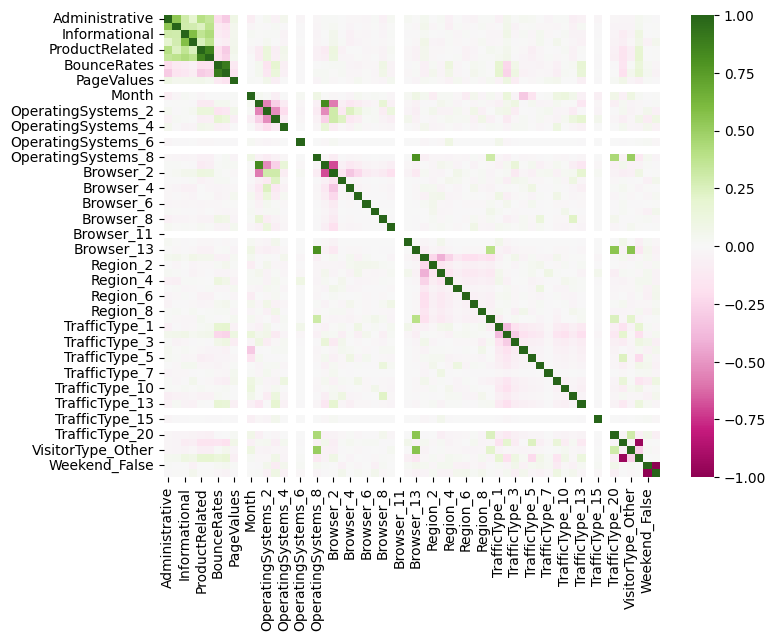

In [30]:
plt.figure(figsize=(8, 6))

cor = train_small_df.corr() 
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG");

In [31]:
cor

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
Administrative,1.000000,0.546824,0.299150,0.196876,0.400925,0.350636,-0.214849,-0.301967,0.091281,NaN,...,-0.051957,NaN,-0.023602,NaN,-0.020949,-0.029637,-0.025834,0.036985,0.013890,-0.013890
Administrative_Duration,0.546824,1.000000,0.292491,0.288726,0.240900,0.382364,-0.118887,-0.171088,0.052732,NaN,...,0.018216,NaN,-0.014018,NaN,-0.035134,-0.033917,-0.038751,0.045301,-0.001550,0.001550
Informational,0.299150,0.292491,1.000000,0.579477,0.362565,0.425383,-0.099578,-0.133457,0.052315,NaN,...,-0.039496,NaN,-0.012779,NaN,-0.038486,-0.099075,-0.041497,0.109105,-0.005203,0.005203
Informational_Duration,0.196876,0.288726,0.579477,1.000000,0.253249,0.368765,-0.061780,-0.093088,0.060509,NaN,...,-0.047496,NaN,-0.007574,NaN,-0.039790,-0.077014,-0.017146,0.079917,-0.048825,0.048825
ProductRelated,0.400925,0.240900,0.362565,0.253249,1.000000,0.863309,-0.192795,-0.291637,0.062569,NaN,...,0.001587,NaN,-0.006132,NaN,-0.059426,-0.164896,-0.078352,0.184598,-0.002192,0.002192
ProductRelated_Duration,0.350636,0.382364,0.425383,0.368765,0.863309,1.000000,-0.181277,-0.259824,0.040235,NaN,...,-0.004434,NaN,-0.008906,NaN,-0.064707,-0.169837,-0.074989,0.188280,-0.003870,0.003870
BounceRates,-0.214849,-0.118887,-0.099578,-0.061780,-0.192795,-0.181277,1.000000,0.901751,-0.120011,NaN,...,0.177008,NaN,-0.008231,NaN,-0.009166,-0.157833,0.015269,0.147453,0.024690,-0.024690
ExitRates,-0.301967,-0.171088,-0.133457,-0.093088,-0.291637,-0.259824,0.901751,1.000000,-0.179437,NaN,...,0.159402,NaN,-0.003875,NaN,-0.007366,-0.190786,0.054161,0.166674,0.045103,-0.045103
PageValues,0.091281,0.052732,0.052315,0.060509,0.062569,0.040235,-0.120011,-0.179437,1.000000,NaN,...,-0.064169,NaN,-0.011061,NaN,0.019564,0.077244,-0.031390,-0.064417,0.014281,-0.014281
SpecialDay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Drop the features with high correlation.We'll do this by looking at each pair of features, and if they are highly correlated (at least 0.8), we won't include the second feature in the pair. 
* Store the remaining set of features (the ones you didn't drop) in dataframe `train_df_reduced`

In [32]:
cor.shape

(60, 60)

In [33]:
import numpy as np

keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_columns[j] = False

selected_columns = df_train.columns[keep_columns]


In [34]:
# Remove highly correlated variables in train and test data

X_train_reduced = df_train[selected_columns]
X_train_reduced.shape

X_test_reduced = df_test[selected_columns] 
X_test_reduced.shape 

(6875, 55)

(2091, 55)

In [35]:
selected_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Month', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_10', 'Browser_11', 'Browser_12',
       'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6',
       'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'Weekend_False', 

 ****Observations** The highly correlated features : 
- `ProductRelated_Duration` and `ExitRate'
- `ProductRelated` and `ProductRelated_Duration`
- Same case between `ExitRate` and `BounceRate`

****QUESTION**: - Does it matter much whether I transform dataset first then calculate correlation or the other way around? I ask because I tried getting the correlation before transforming and I noticed that the Pearson heatmap automatically removed some categorical columns (specifically `VisitorType`) so I decided to trasnform first

### Classification1:  Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [37]:

%time

lr_model = LogisticRegression(class_weight='balanced') 
lr_model.fit(X_train_reduced, y_train)

lr_pred = lr_model.predict(X_test_reduced) 

print(classification_report(y_test, lr_pred))


CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 17.9 µs


LogisticRegression(class_weight='balanced')

              precision    recall  f1-score   support

       False       0.99      0.84      0.91      1896
        True       0.38      0.92      0.54       195

    accuracy                           0.85      2091
   macro avg       0.69      0.88      0.73      2091
weighted avg       0.93      0.85      0.88      2091



### Classification2:  Support Vector Machine (SVM)

In [38]:
from sklearn.svm import LinearSVC

%time
svm_model = LinearSVC(class_weight='balanced') 
svm_model.fit(X_train_reduced,  y_train)

svm_pred = svm_model.predict(X_test_reduced)

print(classification_report(y_test, svm_pred))


CPU times: user 15 µs, sys: 7 µs, total: 22 µs
Wall time: 6.68 µs


LinearSVC(class_weight='balanced')

              precision    recall  f1-score   support

       False       0.99      0.91      0.94      1896
        True       0.49      0.88      0.63       195

    accuracy                           0.90      2091
   macro avg       0.74      0.89      0.79      2091
weighted avg       0.94      0.90      0.91      2091



****Discussion on Peformance metrics**:  
- The two models seem to be  relatively comparable in performance as demonstrated in the output although Linear model 
has higher recall (91%) meaning that it's better at predicting actual positives > SVM Model (81%)
- On other hand, SVM has better accuracy (90%) > Linear (85%). THough other metrics should take precedence given that the dataset is imbalanced.

## **Task 2. Customer Segmentation (25 points)**

Generate user-behavior clusters based on the purchasing behavior data for the complete dataset.

1. How many clusters do you see? What are the significant differences between the various clusters in terms of the size of the clusters and purchase ratio. Perform as detailed analysis of the clusters.
2. Return plots and cluster images generated for the data.
3. Perform a detailed analysis for each cluster corresponding to the variations in features and identify some behaviors corresponding to each particular cluster (e.g., which cluster represent new shoppers vs. brand conscious shoppers etc.).

### PCA for Dimensionality reduction


In [39]:
X = train_df.drop("Revenue", axis=1)
y = train_df["Revenue"]

X.shape

(6875, 17)

In [40]:
from sklearn.decomposition import PCA

# normalize data before applying PCA- 
def preprocess(X):
    scaler = MinMaxScaler() 
    X_num = scaler.fit_transform(X[numericalFeatures]) 
    
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[categoricalFeatures])
    new_cat_features = list(ohe.get_feature_names_out(categoricalFeatures))
    
    X_transformed = np.hstack([X_num, X_cat])
    
    
    return  new_cat_features, X_transformed

new_cat_features, X_transformed  = preprocess(X)


In [41]:

pca = PCA(n_components=10, random_state=42, whiten=True)
X_reduced = pca.fit_transform(X_transformed)

In [42]:
X_reduced.shape   # reduced from 17 - > 10 features

(6875, 10)

In [43]:
print("Explained variation per principal component:", "\n")
print(pca.explained_variance_ratio_)

Explained variation per principal component: 

[0.15336774 0.10490084 0.10218118 0.08190622 0.07848789 0.06293462
 0.0428424  0.04026896 0.02969374 0.0252809 ]


### KMeans Clustering  on the reduced data- 

In [44]:
from sklearn.cluster import KMeans


def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        my_cluster = KMeans(init="k-means++", n_clusters=k, random_state=10).fit(X) 
        inertias.append(my_cluster.inertia_) 
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

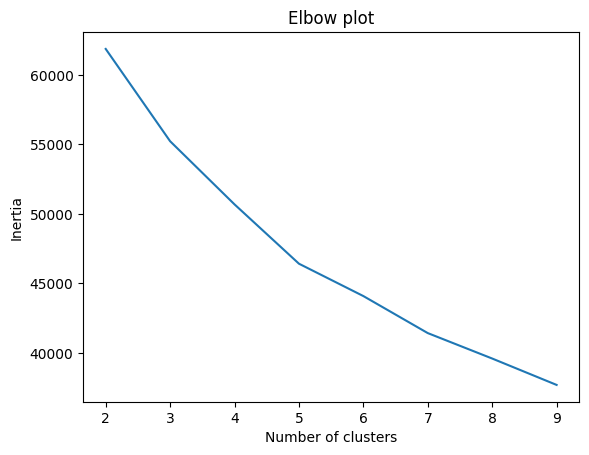

In [45]:
visualize_elbow(X_reduced, ks=range(2,10))

** **Discussion:** 
- A big disadvantage of elbow plot is that it's hard to determine the optimal value for k when there is no obvious "elbow" formation in the plot
 as in this case, though I would say `k=5` and `k=7` seems like decent choices. I will use  another method `silhoutte score` to visualize k-means for k

In [ ]:
from utils import visualize_silhouette

visualize_silhouette(max_clusters=8, X=X_reduced)

For n_clusters = 2 The average silhouette_score is : 0.13939781321085243
For n_clusters = 3 The average silhouette_score is : 0.15333577675324545
For n_clusters = 4 The average silhouette_score is : 0.1612122626773783
For n_clusters = 5 The average silhouette_score is : 0.18854191762705308
For n_clusters = 6 The average silhouette_score is : 0.16785688520876224
For n_clusters = 7 The average silhouette_score is : 0.17122598035475511


****Discussion**: Consider the following when analysing for the optimat k-value

- Scores << average silhouette score = unacceptable
- Negative scores = assigned to wrong clusters
- Scores near 0 = close to decision boundary

Given the criteria above, all plots above contain only positive values and low silhouette scores (significantly << 1). Thus my judgment is based on a comparison of the average silhoutte scores for 

{`k=5` : `0.1885`, `k=7` : `0.1712`}; I think `k=5` is the better option because we get neighboring clusters of similar sizes and even distribution

In [ ]:
# Let's try with 5 clusters 

km = KMeans(n_clusters=5, random_state=0)
km.fit(X_reduced)
train_df["km_cluster"] = km.predict(X_reduced)


# check the size of each cluster
clusters_size = pd.DataFrame(km.labels_, columns=["cluster"]).value_counts() \
                                .reset_index().rename(columns={0:'size'}).set_index("cluster") \
                                        .sort_index()
clusters_size



clusters_size['%']=  clusters_size["size"]/len(X_reduced)
cs = clusters_size.sort_index()
print(cs)


In [ ]:

print("% of sessions resulting in revenues by cluster: ")
train_df.groupby("km_cluster")["Revenue"].mean()

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np

sc = SpectralClustering(n_clusters=5, assign_labels="discretize",
                        random_state=42).fit(X_reduced)

fig, ax = plt.subplots()
ax.scatter(X_reduced[:,0], X_reduced[:,1], s=9, c=sc.labels_)
plt.show() ;

****Observation**:
- My recommendations to the business would be to invest more time and resources into growing the customer base in clusters 0 and 1 given that they contribute the highest to revenue despite being the smallest segment. In addition, to investigate cluster3, their biggest segment that doesn't maximize in revenue.

## **Task 3. Semi-Supervised Learning (15 points)**

Consider you have training data with the Revenue attribute for records from June—September only. For all records from October—December, however, Revenue attribute is missing. Build a semi-supervised self-labeling model to estimate Revenue for the missing records in October—December and then fit your classifier. Report classification performance on February—March data set with and without the self-labeled data.

1. If you do not consider the records from October—December, generate the classification performance on test data
2. After using the self-labeled data and training data together, does the classification performance on test data improve? Discuss which metrics are most important for your conclusion.


In [ ]:
X_train_labeled = train_df[train_df['Month'].isin([6,7,8,9])] # self-labeled data 
X_train_unlabeled = train_df[train_df['Month'].isin([10,11,12])] #  without self-labeled data 

y_train_labeled = X_train_labeled.pop('Revenue')
y_train_unlabeled = X_train_unlabeled.pop('Revenue')

X_train = pd.concat([X_train_labeled, X_train_unlabeled])
y_train = np.concatenate((y_train_labeled, y_train_unlabeled))

X_test = train_df[train_df['Month'].isin([2,3])]  # report performance with/ without self-labeled data 
y_test = X_test.pop('Revenue')

In [ ]:
print("labeled data samples: {}".format(len(X_train_labeled)))
print("unlabeled data samples: {}".format(len(X_train_unlabeled)))

### Classification performance on unlabeled test data

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def train(X_train, X_test, y_train, y_test, standardize = True) -> None:
    
    if standardize == True: 
        pipeline = make_pipeline(StandardScaler(),\
            LogisticRegression(class_weight="balanced").fit(X_train, y_train))
    
    else:
        pipeline = make_pipeline(LogisticRegression(class_weight="balanced").fit(X_train, y_train))
        
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred))
    
#train(X_train, X_test, y_train, y_test, standardize=True)

In [ ]:
# without label spreading
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def train_classification(X_train,X_test, y_train, y_test, standardize = True) -> None:
    numeric_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

    if standardize:
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numericalFeatures),
                        ]
                                        )    
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat", categorical_transformer, categoricalFeatures),
                        ]
                                        )    
    pipe = Pipeline(
        steps=[("preprocessor", preprocessor), ("model", LogisticRegression(class_weight='balanced'))]
                   )

    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))
    

#train_classification(X_train,X_test, y_train, y_test, standardize=True)



### Semi-Supervised Learning

In [ ]:
y_train = np.concatenate((y_train_labeled, np.full(y_train_unlabeled.shape, -1))) 

In [ ]:
assert y_train.shape[0]==X_train.shape[0]

In [ ]:
from sklearn.semi_supervised import LabelSpreading


def train_LabelSpreading(X, y, scale=True):
    ohe = OneHotEncoder(handle_unknown='ignore',sparse = False)
    X_cat = ohe.fit_transform(X[categoricalFeatures])
    new_cat_features = ohe.get_feature_names_out(categoricalFeatures)
    
    if scale:
        scaler = MinMaxScaler()
        X_num = scaler.fit_transform(X[numericalFeatures])
    else:
        X_num = X[numericalFeatures].to_numpy()
        
    X_transformed = np.hstack([X_num, X_cat])


    label_prop_model = LabelSpreading(kernel='knn', alpha=0.01)
    label_prop_model.fit(X_transformed,y)
    semi_sup_preds = label_prop_model.transduction_[y_train_labeled.shape[0]:]
    
    return semi_sup_preds

In [ ]:
# without scaling numerical features

semi_sup_preds = train_LabelSpreading(X_train,y_train, scale=False)  

print(classification_report(y_train_unlabeled, semi_sup_preds)) 

In [ ]:
## with scaling numerical features

semi_sup_preds = train_LabelSpreading(X_train,y_train)    

print(classification_report(y_train_unlabeled, semi_sup_preds)) 

In [ ]:
y_train = np.concatenate((y_train_labeled, semi_sup_preds)) 

train_classification(X_train,X_test, y_train, y_test, scale=True)